# **1. Mount Google Drive:**

In [16]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **2. Import Necessary Libraries:**

In [17]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
import joblib
import matplotlib.pyplot as plt
import seaborn as sns


# **3. Load the Dataset:**

In [18]:
import pandas as pd

# Load train dataset
train_data_path = "/content/drive/MyDrive/customer-churn-prediction/data/processed/train.csv"
df_train = pd.read_csv(train_data_path)

# Load test dataset
test_data_path = "/content/drive/MyDrive/customer-churn-prediction/data/processed/test.csv"
df_test = pd.read_csv(test_data_path)

# Separate features and target
target_column = 'Churn'
X_train = df_train.drop(columns=[target_column])
y_train = df_train[target_column]

X_test = df_test.drop(columns=[target_column])
y_test = df_test[target_column]

print("✅ Train and test datasets loaded successfully!")


✅ Train and test datasets loaded successfully!


# **4. Data Preprocessing:**

**Handle Missing Values:**

In [19]:
df_train.isnull().sum()
# Handle missing values as appropriate


,0
CustomerID,0
Churn,0
Tenure,0
CityTier,0
WarehouseToHome,0
Gender,0
HourSpendOnApp,0
NumberOfDeviceRegistered,0
SatisfactionScore,0
NumberOfAddress,0


**Encode Categorical Variables:**

In [20]:
df_train = pd.get_dummies(df_train, drop_first=True)

# **5. Feature Scaling:**

In [21]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df_train.drop('Churn', axis=1))
df_scaled = pd.DataFrame(scaled_features, columns=df_train.columns[:-1])
df_scaled['Churn'] = df_train['Churn'].values


# **6. Model Training and Evaluation:**

**Logistic Regression:**

In [22]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# Train Logistic Regression
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
y_pred_log_reg = log_reg.predict(X_test)

# Print classification report
print("Logistic Regression:\n", classification_report(y_test, y_pred_log_reg))

Logistic Regression:
               precision    recall  f1-score   support

           0       0.88      0.94      0.91       724
           1       0.61      0.41      0.49       151

    accuracy                           0.85       875
   macro avg       0.75      0.68      0.70       875
weighted avg       0.84      0.85      0.84       875



/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


**Random Forest Classifier:**

In [23]:
from sklearn.ensemble import RandomForestClassifier

# Train Random Forest
rf_clf = RandomForestClassifier()
rf_clf.fit(X_train, y_train)
y_pred_rf = rf_clf.predict(X_test)

# Print classification report
print("Random Forest:\n", classification_report(y_test, y_pred_rf))

Random Forest:
               precision    recall  f1-score   support

           0       0.96      0.99      0.98       724
           1       0.97      0.80      0.88       151

    accuracy                           0.96       875
   macro avg       0.96      0.90      0.93       875
weighted avg       0.96      0.96      0.96       875



**Gradient Boosting Classifier:**

In [24]:
from sklearn.ensemble import GradientBoostingClassifier

# Train Gradient Boosting
gb_clf = GradientBoostingClassifier()
gb_clf.fit(X_train, y_train)
y_pred_gb = gb_clf.predict(X_test)

# Print classification report
print("Gradient Boosting:\n", classification_report(y_test, y_pred_gb))


Gradient Boosting:
               precision    recall  f1-score   support

           0       0.93      0.97      0.95       724
           1       0.79      0.64      0.71       151

    accuracy                           0.91       875
   macro avg       0.86      0.80      0.83       875
weighted avg       0.90      0.91      0.90       875



**Support Vector Machine:**

In [25]:
from sklearn.svm import SVC

# Train SVM
svc_clf = SVC(probability=True)
svc_clf.fit(X_train, y_train)
y_pred_svc = svc_clf.predict(X_test)

# Print classification report
print("Support Vector Machine:\n", classification_report(y_test, y_pred_svc))

Support Vector Machine:
               precision    recall  f1-score   support

           0       0.83      1.00      0.91       724
           1       0.00      0.00      0.00       151

    accuracy                           0.83       875
   macro avg       0.41      0.50      0.45       875
weighted avg       0.68      0.83      0.75       875



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [30]:
# Define and train optimized Random Forest model
best_rf = RandomForestClassifier(
    n_estimators=150,    # Reduce trees slightly
    max_depth=8,         # Reduce depth to prevent overfitting
    min_samples_split=15, # Require more samples to split a node
    min_samples_leaf=8,   # Reduce complexity
    max_features='sqrt',  # Reduce overfitting
    random_state=42
)

best_rf.fit(X_train, y_train)  # ⬅️ TRAINING HAPPENS HERE

# Save the trained model
import joblib
joblib.dump(best_rf, model_path)  # ⬅️ MODEL SAVING


['/content/drive/MyDrive/customer-churn-prediction/models/best_random_forest_model.pkl']

# **7. Hyperparameter Tuning:**

In [32]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Define parameter grid for tuning
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [5, 10],
    'min_samples_leaf': [2, 5],
    'max_features': ['sqrt']
}

# Initialize Random Forest model
rf = RandomForestClassifier(random_state=42)

# Perform Grid Search CV
grid_search = GridSearchCV(rf, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Best model after tuning
best_rf_clf = grid_search.best_estimator_

# Save the optimized model
joblib.dump(best_rf_clf, "/content/drive/MyDrive/customer-churn-prediction/models/best_random_forest_model.pkl")

print("✅ Model tuning complete. Best parameters found:", grid_search.best_params_)


✅ Model tuning complete. Best parameters found: {'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 200}


# **8. Evaluate the Best Model:**

In [33]:
y_pred_best_rf = best_rf_clf.predict(X_test)
print("Optimized Random Forest:\n", classification_report(y_test, y_pred_best_rf))

Optimized Random Forest:
               precision    recall  f1-score   support

           0       0.95      1.00      0.97       724
           1       0.97      0.74      0.84       151

    accuracy                           0.95       875
   macro avg       0.96      0.87      0.90       875
weighted avg       0.95      0.95      0.95       875



# **9. Save the Best Model:**

In [34]:
joblib.dump(best_rf_clf, '/content/drive/MyDrive/customer-churn-prediction/models/best_random_forest_model.pkl')

['/content/drive/MyDrive/customer-churn-prediction/models/best_random_forest_model.pkl']

# **10. Visualize Feature Importances:**

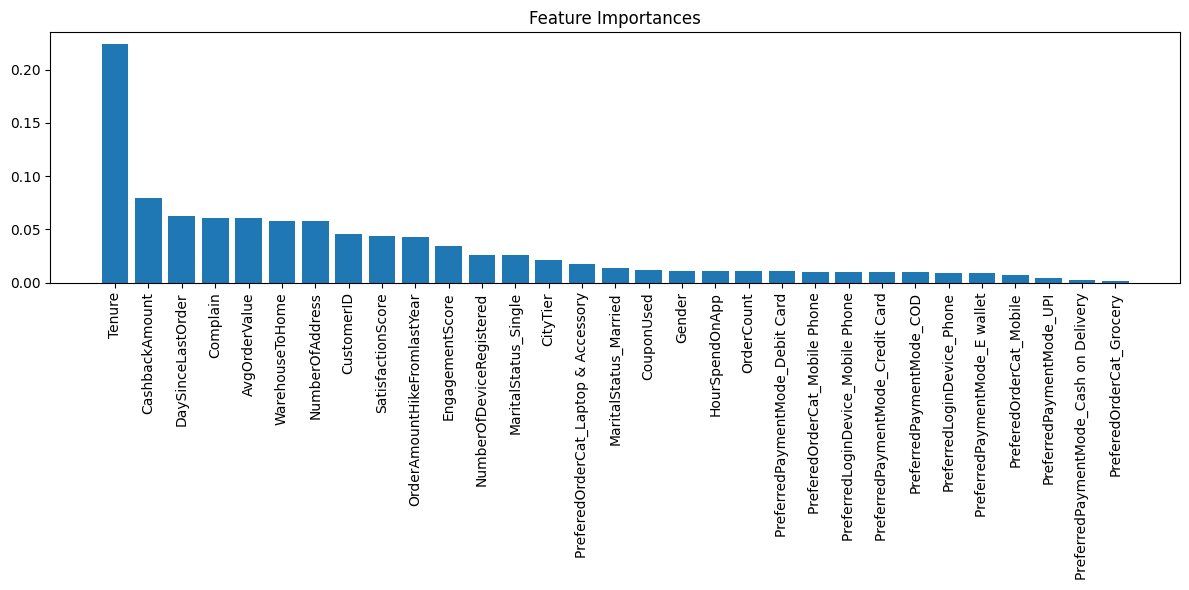

In [35]:
import numpy as np
import matplotlib.pyplot as plt

importances = best_rf_clf.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(12, 6))
plt.title("Feature Importances")
plt.bar(range(X_train.shape[1]), importances[indices], align="center")
plt.xticks(range(X_train.shape[1]), X_train.columns[indices], rotation=90)
plt.tight_layout()
plt.show()
